In [1]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
input_files = ["fridges.jsonline", "headphones.jsonline", "keyboards.jsonline",
               "laptop_bags.jsonline", "laptops.jsonline", "mice.jsonline", "phones.jsonline",
               "tvs.jsonline", "usb_sticks.jsonline"]

In [3]:
dfs = []
for input_file in input_files:
    frame = pd.read_json(input_file, lines=True)
    frame.name = input_file.split(".")[0]
    dfs.append(frame)
dfs[0]

,author,date_published,product_name,rating_max,rating_min,rating_value,review_markup,vote_extra_info,vote_negative,vote_positive
0,\nАртём,2017-10-14,Двухкамерный холодильник LG GA-B429SMQZ,5,1,5,Дизайн просто супер. Качество материалов на вы...,\n100% пользователей считают этот отзыв полезн...,,3
1,\nLollij KLM,2018-1-09,Двухкамерный холодильник LG GA-B429SMQZ,5,1,5,Долго решал Самсунг или ЛЖ и всетаки купил эту...,\n100% пользователей считают этот отзыв полезн...,,2
2,\nМаксим Пилипенко,2018-3-28,Двухкамерный холодильник INDESIT DS 3181 W (UA),5,1,5,Купил неделю назад этот холодильник. Пока всё ...,\n100% пользователей считают этот отзыв полезн...,,1
3,\nОлег Малицький,2018-3-17,Двухкамерный холодильник INDESIT DS 3181 W (UA),5,1,3,"Холодильником користуюсь близько трьох тижнів,...",,1,
4,\nЛюдмила,2018-3-12,Двухкамерный холодильник INDESIT DS 3181 W (UA),5,1,5,С холодильным оборудованием INDESIT моя семья ...,,,
5,\nИгорь,2018-3-12,Двухкамерный холодильник INDESIT DS 3181 W (UA),5,1,5,Получили этого роботягу в качестве подарка на ...,\n100% пользователей считают этот отзыв полезн...,,1
6,\nLeona,2018-3-12,Двухкамерный холодильник INDESIT DS 3181 W (UA),5,1,5,Любителям класики пораджу придбання двокамерно...,,,
7,\nОлена Василівна,2018-3-15,Двухкамерный холодильник INDESIT LI9 S1Q X,5,1,5,Місяць вже як користуюся холодильником Купувал...,,,
8,\nОрел Евгений,2018-2-24,Двухкамерный холодильник INDESIT LI9 S1Q X,5,1,5,"Всё супер, заказал в воскресенье в обед , во в...",,,
9,\nІрина,2018-2-11,Двухкамерный холодильник INDESIT LI9 S1Q X,5,1,5,Все чудово працює..стильний і гарна ціна!,,,


In [4]:
def detect_lang(text):
    try:
        return detect(text)
    except:
        return "N/A"
for df in dfs:
    df['lang'] = df['review_markup'].apply(detect_lang)

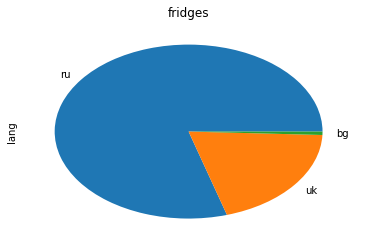

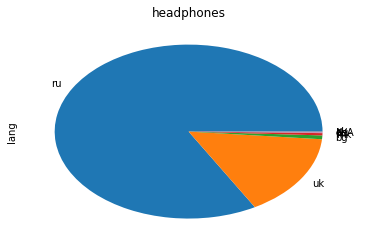

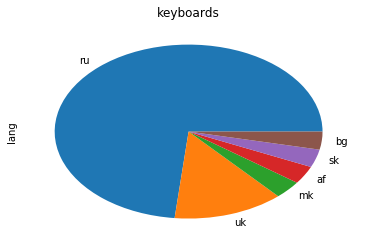

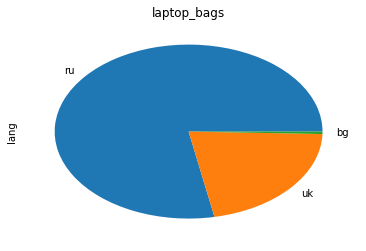

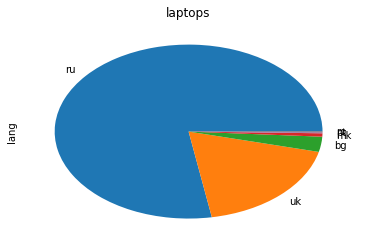

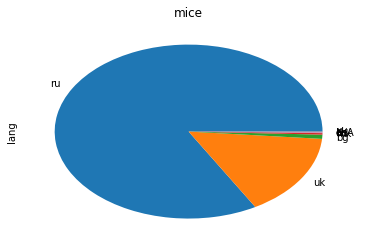

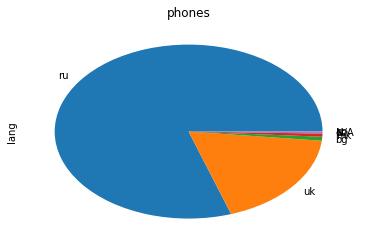

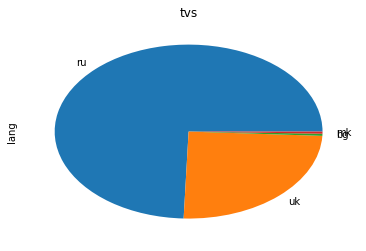

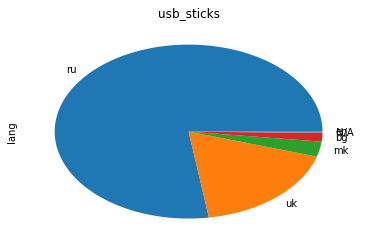

In [65]:
for df in dfs:
    df['lang'].value_counts().plot(kind='pie', title = df.name)
    plt.show()

In [5]:
df_all = pd.concat(dfs)

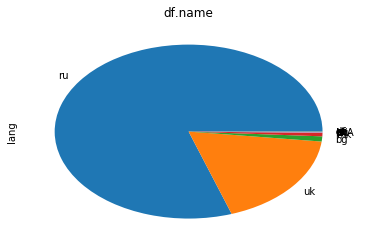

In [67]:
df_all['lang'].value_counts().plot(kind='pie', title = "df.name")

В некоторых фреймах очень много примесей не ру/уа языков. Много в % соотношении, потому что именно эти выборки небольшие.

In [69]:
df_all['lang'].value_counts()

ru     5967
uk     1336
bg       71
mk       46
N/A       6
en        3
sk        3
de        2
et        1
af        1
so        1
pt        1
ro        1
Name: lang, dtype: int64

Гипотеза: проблема в слове "Недостатки/Преимущества". Станет ли лучше, если их заменить?

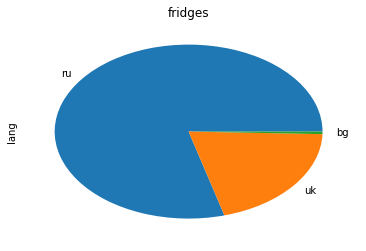

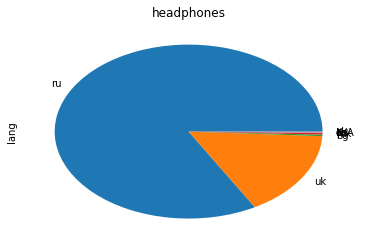

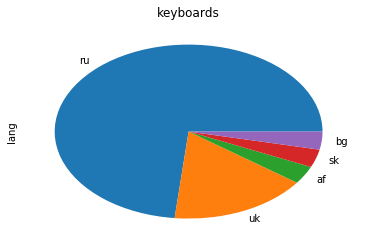

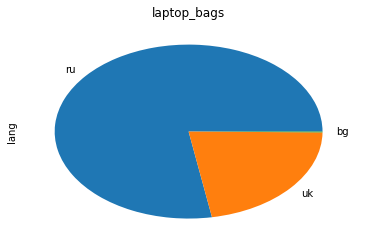

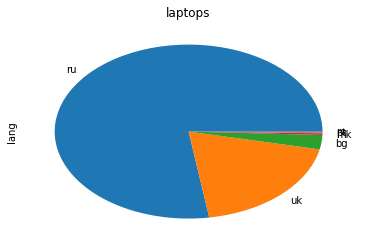

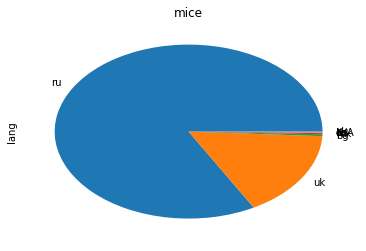

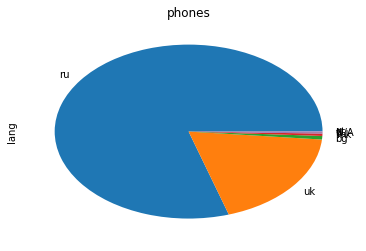

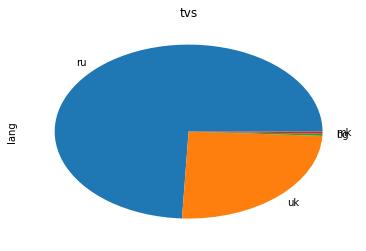

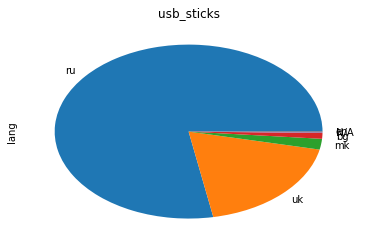

In [70]:
for df in dfs:
    df['review_markup'] = df['review_markup'].apply(lambda str: re.sub("\nНедостатки", "\nНедоліки", re.sub("\nДостоинства:", "\nПереваги:", str)))
    df['lang'] = df['review_markup'].apply(detect_lang)
    df['lang'].value_counts().plot(kind='pie', title = df.name)
    plt.show()

In [71]:
df_all_ukrainified = pd.concat(dfs)

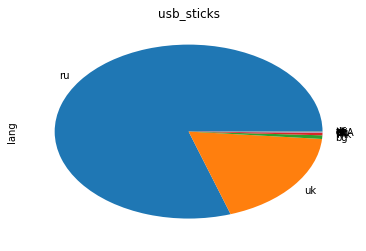

In [72]:
df_all_ukrainified['lang'].value_counts().plot(kind='pie', title = df.name)

In [73]:
df_all_ukrainified['lang'].value_counts()

ru     5957
uk     1381
bg       50
mk       32
N/A       6
en        3
sk        3
de        2
et        1
af        1
tl        1
pt        1
ro        1
Name: lang, dtype: int64

In [74]:
df_all_ukrainified[(df_all_ukrainified['lang'] != df_all['lang']) & (df_all_ukrainified['lang'] == 'uk')]

,author,date_published,product_name,rating_max,rating_min,rating_value,review_markup,vote_extra_info,vote_negative,vote_positive,lang
47,\nЄгор,2018-3-28,Двухкамерный холодильник ELENBERG MRF-221-O,5,1,5,Хороший бюджетний холодильник\nПереваги: Тихий...,,,,uk
183,\nІван Сеник,2018-1-30,Однокамерный холодильник ELECTROLUX ERF4113AOW,5,1,5,Хороший холодильник. Що тут більше скажеш.,,1,,uk
282,\nВиталий,2018-3-14,Холодильник SAMSUNG RB30J3000WW/UA,5,1,5,Який строк служби цього холодильника?\nПереваг...,,,,uk
50,\nСергей,2018-3-28,Мышь A4Tech Bloody AL90 USB Black (4711421917964),5,1,5,Мишка просто бомба!!!\nПереваги: Дуже зручна!!...,,,,uk
57,\nIrylj Grafira,2018-3-28,Мышь A4Tech G3-200N Wireless Black (4711421902...,5,1,5,Мышка бомба\nПереваги: Люблю ее\nНедоліки: Нет,,,,uk
552,\nіван заводенко,2018-1-30,Мышь Fantech W556 Wireless Black (W556b),5,1,5,хороша робота ваших магазина рекомендую\nПерев...,\n50% пользователей считают этот отзыв полезным\n,1,1,uk
751,\nВиталий Дидык,2016-11-25,Мышь Real-El RM-302 Wireless Black,5,1,5,Нормальная мишка все робота.\nПереваги: Цена д...,\n100% пользователей считают этот отзыв полезн...,,2,uk
968,\nМороз Владимир,2018-3-22,Мышь Genius DX-150X USB Black/Blue (31010231102),5,1,4,"Строго, удобно, отлично\nПереваги: Цена\nНедол...",,,,uk
1132,\nr.bondar2013,2017-12-20,Мышь A4Tech N-360-1 USB Grey (4711421865180),5,1,4,+\nПереваги: Ціна\nНедоліки: Дуже голосно клацає,,,,uk
1164,\nТетяна,2018-1-16,Мышь HP X1200 USB Black/Red (H6F01AA),5,1,3,"Мишка чудово працює, але злегка скрипить колес...",,,,uk


чисто визуально, часть из этих отзывов - на русском. Предполагаем, что гипотеза проверку не прошла, возвращаемся к оригинальному варианту, но делаем замену перед сохранением. Выбираем только те, где детектор опеределил "uk"

In [6]:
df_all.describe()

,rating_max,rating_min,rating_value
count,7439.0,7439.0,7439.000000
mean,5.0,1.0,4.511897
std,0.0,0.0,1.033110
min,5.0,1.0,1.000000
25%,5.0,1.0,5.000000
50%,5.0,1.0,5.000000
75%,5.0,1.0,5.000000
max,5.0,1.0,5.000000


Видим, что средний отзыв по всей выбоке – 4.5 с отклонением 1.033, что значит, что у нас будут скорее всего несбалансированные классы, если мы поставим соответствие 1/2 - негативный, 3 - нейтральный и 4/5 - позитивный отзыв. Также нужно проверить это на нашей подвыборке.

In [8]:
df_all['rating_value'].value_counts()

5    5619
4     917
1     321
3     316
2     266
Name: rating_value, dtype: int64

In [9]:
to_save = df_all[df_all['lang'] == "uk"].copy()

In [21]:
to_save['review_markup'] = to_save['review_markup'].apply(lambda str: re.sub("\nНедостатки", "\nНедоліки", re.sub("\nДостоинства:", "\nПереваги:", str)))

In [95]:
to_save['rating_value'].value_counts()

5    974
4    190
3     58
2     58
1     58
Name: rating_value, dtype: int64

In [22]:
to_save['rating_value'].describe()

count    1338.000000
mean        4.467862
std         1.056772
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating_value, dtype: float64

В подвыборке среднее и отклонение немногим отличаются от общей выборки.

Есть вероятность наличия мусорных сообщений (хотя часть уже отсеялась на этапе детекции языков и попала в "N/A"/другие языки), но посмотрим на распределение длинн коментариев (и оценок)

In [23]:
to_save['review_markup'].str.len().describe()

count    1338.000000
mean      367.227205
std       485.708351
min         6.000000
25%       116.000000
50%       224.500000
75%       419.000000
max      4665.000000
Name: review_markup, dtype: float64

Минимальная длинна 6, что настроаживает с учетом того, что в разметке должны присутствовать слова "Переваги:" и "Недоліки"

In [38]:
to_save[to_save['review_markup'].str.len() < 17]

,author,date_published,product_name,rating_max,rating_min,rating_value,review_markup,vote_extra_info,vote_negative,vote_positive,lang
95,\nолег,2018-4-01,Холодильник LIEBHERR CU 3311,5,1,4,Ціна якість.,,,,uk
231,\nАндрей Михайловский,2018-2-01,Двухкамерный холодильник BEKO DSA 28020,5,1,5,Працює!,,,,uk
432,\nАндрей,2018-3-16,Мышь Logitech MX Ergo Bluetooth Graphite (910-...,5,1,5,удобно чистить,,,,uk
1133,\nРоман,2017-12-12,Мышь Genius Cam USB Black (31010169101),5,1,3,Скрол не працює.,,1,,uk
104,\nПаньків Марія,2017-11-13,"Сумка для ноутбука Crown Classic 15.6"" Black (...",5,1,5,Солідна сумка,,,,uk
239,\nСвятненко Тарас,2018-4-02,Сумка для ноутбука X-Digital Wilson 116 16'' B...,5,1,5,ціна-якість,,,,uk
127,\ngypalo_roman,2017-10-20,Ноутбук Ноутбук Asus ZenBook 3 UX390UA (UX390U...,5,1,5,Gta5 піде,,1,,uk
216,\nГость,2017-11-26,"Ноутбук Ноутбук Apple MacBook A1534 12"" Space ...",5,1,5,Це 2016 рік?,\n50% пользователей считают этот отзыв полезным\n,1,1,uk
407,\nКолосович Марина,2017-2-22,Мышь Crown CMXG-606 USB Black/ Brown,5,1,5,довольна,,,,uk
917,\nАндрей,2018-3-16,Мышь Logitech MX Ergo Bluetooth Graphite (910-...,5,1,5,удобно чистить,,,,uk


если зайдем и посмотрим на некоторые из этих отзывов, окажется, что не обязательно им всем иметь секции преимущества/недостатки + некоторые из подобных отзывов удаляют.

In [70]:
pd.concat([to_save, to_save['review_markup'].str.len().rename('length')], axis=1).sort_values(by='length', ascending=False)[0:50]['rating_value'].value_counts()

5    49
4     1
Name: rating_value, dtype: int64

Из наблюдений:
    - топ 3 длинных отзыва - у холодильников
    - иногда попадаются дубликаты сообщений, не знаю, проблема ли механизма получения данных или они повторно постились на самой розетке
    - топ-50 сообщений по длинне (за исключением 47го) с рейтингом 5, поэтому с ними могло бы сработать простое правило "длинна > 1412 => 5", у топ-100 - 90 с рейтингом 5

In [76]:
rating_vs_len = pd.concat([(to_save['rating_value'].rename('rating')), (to_save['review_markup'].str.len().rename('length'))], axis=1)
rating_vs_len.head(3)

,rating,length
3,3,163
6,5,1745
7,5,274


In [88]:
rating_vs_len.groupby('rating').describe()

length                                                             
        count        mean         std   min     25%    50%     75%     max
rating                                                                    
1        58.0  223.379310  156.697365   6.0  117.00  171.5  312.75   669.0
2        58.0  304.241379  211.902685  49.0  143.25  241.0  426.00   908.0
3        58.0  325.724138  251.128456  16.0  164.00  263.0  396.00  1133.0
4       190.0  264.542105  259.195756  12.0  112.00  175.0  337.25  1474.0
5       974.0  402.046201  546.359999   7.0  114.00  235.5  450.75  4665.0

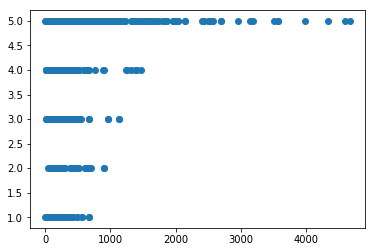

In [85]:
plt.scatter(rating_vs_len['length'], rating_vs_len['rating'])

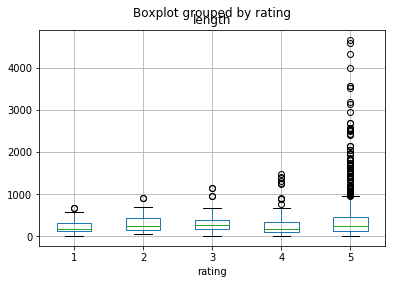

In [87]:
rating_vs_len.boxplot(column='length',by='rating')

видно, что есть пересечения у рейнджей, из забавного, чем выше рейтинг – тем выше максимальная длинна сообщений в нем по сравнению с рейтингами ниже. Распределение среднего имеет условно нормальную форму

In [113]:
# resetting everything just in case
to_save = df_all[df_all['lang'] == "uk"].copy()
to_save['review_markup'] = to_save['review_markup'].apply(lambda str: re.sub("\nНедостатки", "\nНедоліки", re.sub("\nДостоинства:", "\nПереваги:", str)))

In [114]:
mapping = {
    1: 'negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'positive'
}
to_save['class'] = to_save['rating_value'].apply(lambda rating: mapping[rating])
to_save = to_save[['class', 'review_markup']]

In [115]:
to_save['class'].value_counts()

positive    1164
negative     116
neutral       58
Name: class, dtype: int64

Видим дисбаланс классов.

In [116]:
to_save.to_json('cleaned_data.json', orient="records")

In [3]:
!gzip cleaned_data.json

Один из открытых вопросов: является ли использование информации после "недостатки" / "преимущества" читерством или нет 🤔Предположим, что нет, иначе или выкидываем большое % контента, или, если убирать лишь эти 2 слова, то потеряется логическое разбиение, которого придерживаются пользователи
Второй: как определять позитивный/негативный/нейтральный с учетом объективности выставленных оценок и факта, что это влияет на размер дисбаланса классов. И если 1/2/5 - довольно однозначны, то оценка 3 - почти всегда ситуация "имеет недостатки, но они чем-то компенсируются", 4 - "вроде хорошо, но что-то с товаром не так".

Возможно, и другая аналитика была бы интересна
- распределение языков по избранным категориям
- распределение голосований за/против в зависимости языков (и наличия грамматических ошибок :))
- распределение голосований с учетом цены / категории

Но перейдем непосредственно к задаче